In [36]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import drive
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
drive.mount('/drive')
df = pd.read_csv('/drive/MyDrive/CC GENERAL.csv')     # reading cc data set

df.head()                      # results top most rows in a data set

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [38]:
df.shape

(8950, 18)

In [39]:
df.isnull().sum()    #checking any null values are present

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [40]:
mean1=df['CREDIT_LIMIT'].mean()
mean2=df['MINIMUM_PAYMENTS'].mean()
df['CREDIT_LIMIT'].fillna(value=mean1, inplace=True)   # replacing null values with mean of a column
df['MINIMUM_PAYMENTS'].fillna(value=mean2, inplace=True)


In [41]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [42]:
df['TENURE'].value_counts()

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

In [43]:
X = df.drop(['TENURE','CUST_ID'],axis=1).values   # preprocessing the data by removing the columns
y = df['TENURE'].values

In [44]:
# performing PCA
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)   # pca is applied on the data set without output labels
# creating a data frame for the pca results
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
# adding a new column to the data frame
finalDf = pd.concat([principalDf, df[['TENURE']]], axis = 1)
finalDf   # printing the results

,principal component 1,principal component 2,TENURE
0,-4326.383979,921.566882,12
1,4118.916665,-2432.846346,12
2,1497.907641,-1997.578694,12
3,1394.548536,-1488.743453,12
4,-3743.351896,757.342657,12
...,...,...,...
8945,-4208.357725,1122.443291,6
8946,-4123.923788,951.683820,6
8947,-4379.443989,911.504583,6
8948,-4791.117531,1032.540961,6


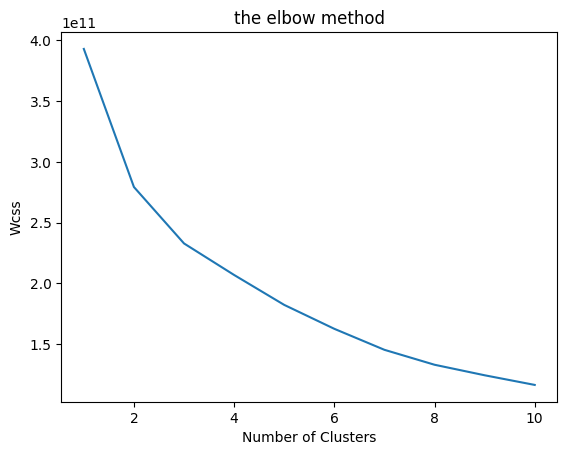

In [45]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [46]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf)       # fitting out kmeans model with our data set

y_cluster_kmeans = km.predict(finalDf)
from sklearn import metrics
score = metrics.silhouette_score(finalDf, y_cluster_kmeans)
print(score)

0.5720391530020281


In [47]:
scaler = StandardScaler()      # feature scaling using standard scaler
X_Scale = scaler.fit_transform(X)

In [48]:
# performing pca
pca3 = PCA(n_components=2)
principalComponents1 = pca3.fit_transform(X_Scale)

principalDf1 = pd.DataFrame(data = principalComponents1, columns = ['principal component 1', 'principal component 2'])

finalDf2 = pd.concat([principalDf1, df[['TENURE']]], axis = 1)
finalDf2

,principal component 1,principal component 2,TENURE
0,-1.718893,-1.072940,12
1,-1.169304,2.509319,12
2,0.938413,-0.382599,12
3,-0.907501,0.045858,12
4,-1.637830,-0.684976,12
...,...,...,...
8945,-0.025276,-2.034128,6
8946,-0.233112,-1.656652,6
8947,-0.593879,-1.828116,6
8948,-2.007672,-0.673767,6


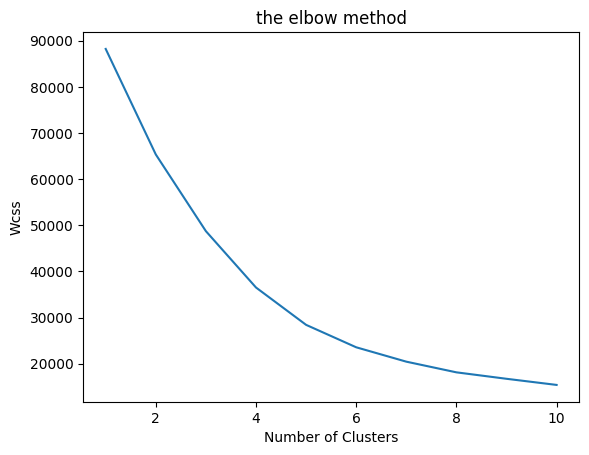

In [49]:
# Use the elbow method to find a good number of clusters with the K-Means algorithm

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finalDf2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [50]:
#  Calculate the silhouette score for the above clustering

nclusters = 3  # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(finalDf2)

y_cluster_kmeans = km.predict(finalDf2)
from sklearn import metrics
score = metrics.silhouette_score(finalDf2, y_cluster_kmeans)
print(score)

0.3836027416860522


2nd question

In [51]:
df1= pd.read_csv("/drive/MyDrive/pd_speech_features.csv")    # reading pd_speech_features csv file
df1.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [52]:
X = df1.drop('class',axis=1).values   # preprocessing the data
y = df1['class'].values

In [53]:
scaler = StandardScaler()    #performing feature selection
X_Scale = scaler.fit_transform(X)

In [54]:
# performing pca
pca4 = PCA(n_components=3)
principalComponents2 = pca4.fit_transform(X_Scale)

principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2',
                                                                    'principal components 3'])
finalDf3 = pd.concat([principalDf2, df1[['class']]], axis = 1)
finalDf3

,principal component 1,principal component 2,principal components 3,class
0,-10.047372,1.471077,-6.846402,1
1,-10.637725,1.583749,-6.830974,1
2,-13.516185,-1.253542,-6.818695,1
3,-9.155084,8.833598,15.290906,1
4,-6.764470,4.611464,15.637122,1
...,...,...,...,...
751,22.322682,6.481911,1.458758,0
752,13.442877,1.449411,9.352300,0
753,8.270264,2.391286,-0.908670,0
754,4.011761,5.412257,-0.847133,0


In [55]:
# splitting our data into training and testing part
X_train, X_test, y_train, y_true = train_test_split(finalDf3[::-1], finalDf3['class'], test_size = 0.30, random_state = 0)

In [56]:
# training and predcting svm model on our data set
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Support Vector Machine's
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.75      1.00      0.86       170

    accuracy                           0.75       227
   macro avg       0.37      0.50      0.43       227
weighted avg       0.56      0.75      0.64       227

[[  0  57]
 [  0 170]]
accuracy is 0.748898678414097


In [57]:
#Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

3rd question

In [58]:
df2= pd.read_csv("/drive/MyDrive/Iris.csv")   # reading iris csv file
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


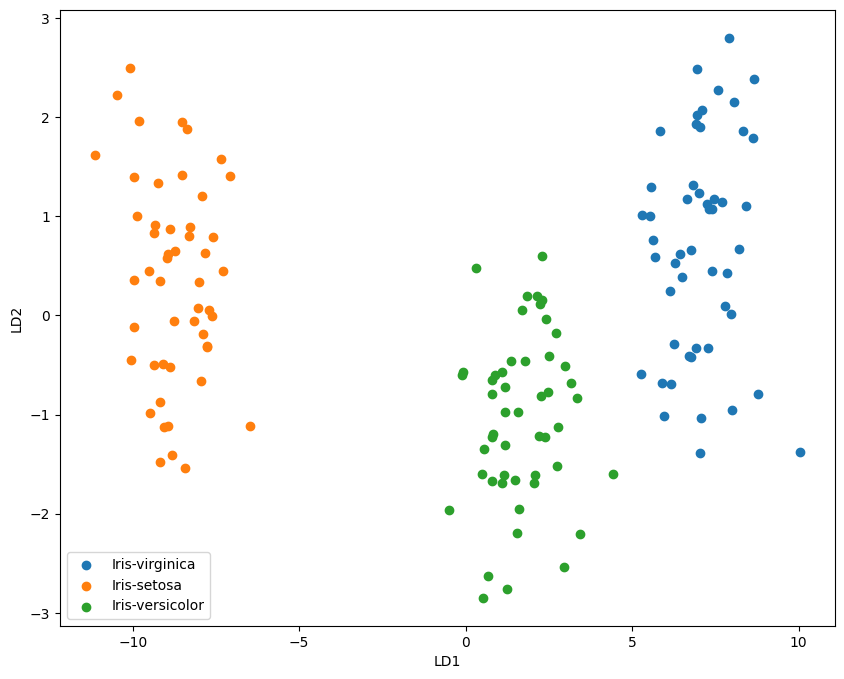

In [63]:

# separating the features and target variables
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

# standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

# applying LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
import matplotlib.pyplot as plt

# visualizing the reduced-dimensional data
plt.figure(figsize=(10, 8))
for species in set(y):
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=species)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

4 question Difference between PCA and LDA

Answer: PCA performs better in case where number of samples per class is less. Whereas LDA works better with large dataset having      multiple classes; class separability is an important factor while reducing dimensionality. PCA finds directions of maximum      variance regardless of class labels while LDA finds directions of maximum class separability.